/tmp/ipykernel_115477/1964821395.py:61: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  l.append((theta_panel, integrate.simps(f, dx=60) * panel_efficiency))


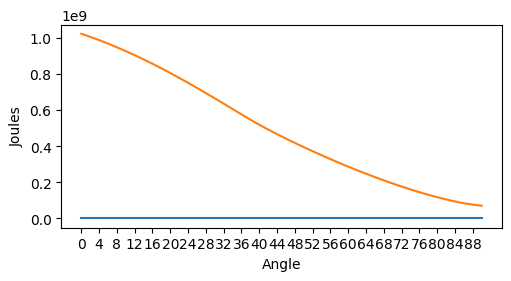

384361797.5851454


/tmp/ipykernel_115477/1964821395.py:48: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  return integrate.simps(f, dx=60) * panel_efficiency


In [40]:
import sympy as sym
import numpy as np
from pvlib.location import Location
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import integrate


#proj = solar_panel_projection(theta_sol, phi_sol, np.deg2rad(38), np.pi)

#fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
#ax.plot(proj)
#ax.set_ylabel("Projection")
#ax.set_xlabel("Time (hour)")
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

def flux(theta_sun, phi_sun, theta_panel, phi_panel, a_0=0.5, irradiance=1100):
    proj = solar_panel_projection(theta_sun, phi_sun, theta_panel, phi_panel)
    flux = proj * a_0 * irradiance
    flux = np.where((0 <= theta_sun) & (theta_sun <= np.pi/2), flux, 0)
    return flux

proj = solar_panel_projection(theta_sol, phi_sol, np.deg2rad(0), np.pi)

#f = flux(theta_sol, phi_sol, np.deg2rad(0), np.pi)
#print(f)
#print(np.min(f), np.max(f))
#fig, bx = plt.subplots(figsize=(5, 2.7), layout='constrained')
#bx.plot(f)
#bx.set_ylabel("flux")
#bx.set_xlabel("Time (hour)")
#bx.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

def mange_vinkler(panel_efficiency=0.2148):
    #flux_at_angles = [(theta_panel, integrate.simps(flux(theta_sol, phi_sol, theta_panel, np.pi), dx=60)) * panel_efficiency for theta_panel in range(91)]
    for theta_panel in range(91):
        f = flux(theta_sol, phi_sol, np.deg2rad(theta_panel), np.pi)
        #print(theta_panel, integrate.simps(f, dx=60) * panel_efficiency)

def panel_production_for_year_for_angle(theta_panel, year=2024, panel_efficiency=0.2148, phi_panel=180):
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    solpos = solar_positions_of_day(loc, start_date, end_date)
    theta_sol = np.deg2rad(solpos["zenith"])
    phi_sol = np.deg2rad(solpos["azimuth"])
    f = flux(theta_sol, phi_sol, np.deg2rad(theta_panel), np.deg2rad(phi_panel))
    return integrate.simps(f, dx=60) * panel_efficiency


def panel_production_for_year_for_integer_angles(panel_efficiency=0.2148, year=2024, phi_panel=180):
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    solpos = solar_positions_of_day(loc, start_date, end_date)
    theta_sol = np.deg2rad(solpos["zenith"])
    phi_sol = np.deg2rad(solpos["azimuth"])
    #f = flux(theta_sol, phi_sol, np.deg2rad(theta_panel), np.pi)
    l = []
    for theta_panel in range(91):
        f = flux(theta_sol, phi_sol, np.deg2rad(theta_panel), np.deg2rad(phi_panel))
        l.append((theta_panel, integrate.simps(f, dx=60) * panel_efficiency))
    return l


#print(panel_production_for_year_for_integer_angles())
fig, cx = plt.subplots(figsize=(5, 2.7), layout='constrained')
cx.plot(panel_production_for_year_for_integer_angles())
cx.set_ylabel("Joules")
cx.set_xlabel("Angle")

cx.set_xticks(range(0, len(panel_production_for_year_for_integer_angles()), 4))  # Show every other value
# min_value = min(panel_production_for_year_for_integer_angles())
# max_value = max(panel_production_for_year_for_integer_angles())
# cx.set_ylim(min_value, max_value) #
plt.show()

print(panel_production_for_year_for_angle(51))

def optimal_integer_angle_for_year(panel_efficiency=0.2148, year=2024):
    for phi_panel in range(175, 185):
        prod = panel_production_for_year_for_integer_angles(panel_efficiency=panel_efficiency, year=year, phi_panel=phi_panel)
        max_prod = max(prod, key=lambda t: t[1])
        print(phi_panel)
        print(max_prod)








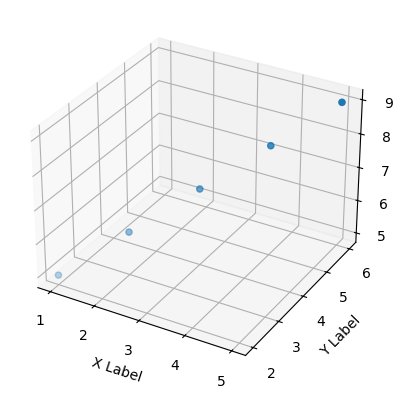

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have three separate arrays for x, y, and z coordinates
x = [1, 2, 3, 4, 5]
y = [2, 3, 4, 5, 6]
z = [5, 6, 7, 8, 9]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x, y, z)

# Set labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [42]:
import sympy as sym
import numpy as np
from pvlib.location import Location
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import integrate

loc = Location(55.786327, 12.524295, tz="Europe/Copenhagen", altitude=40, name="DTU Bygning 101")

def times_of_days(start_date, end_date, freq="h", tz="Europe/Copenhagen"):
    return pd.date_range(start_date + " 00:00:00", end_date + " 23:59:59", inclusive="left", freq=freq, tz=tz)

def solar_positions_of_day(loc, start_date, end_date, freq="h", tz="Europe/Copenhagen"):
    return loc.get_solarposition(times_of_days(start_date, end_date, freq=freq, tz=tz))

# print(solar_positions_of_day(loc, "2024-01-01", "2024-01-01"))

def solar_panel_projection(theta_sun, phi_sun, theta_panel, phi_panel):
    return np.maximum(0, np.sin(theta_sun) * np.sin(theta_panel) * np.cos(phi_sun - phi_panel) + np.cos(theta_sun) * np.cos(theta_panel))

solpos = solar_positions_of_day(loc, "2024-04-20", "2024-04-20")
theta_sol = np.deg2rad(solpos["zenith"])
phi_sol = np.deg2rad(solpos["azimuth"])
#proj = solar_panel_projection(theta_sol, phi_sol, np.deg2rad(38), np.pi)

#fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
#ax.plot(proj)
#ax.set_ylabel("Projection")
#ax.set_xlabel("Time (hour)")
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

def flux(theta_sun, phi_sun, theta_panel, phi_panel, a_0=0.5, irradiance=1100):
    proj = solar_panel_projection(theta_sun, phi_sun, theta_panel, phi_panel)
    flux = proj * a_0 * irradiance
    flux = np.where((0 <= theta_sun) & (theta_sun <= np.pi/2), flux, 0)
    return flux

proj = solar_panel_projection(theta_sol, phi_sol, np.deg2rad(0), np.pi)

#f = flux(theta_sol, phi_sol, np.deg2rad(0), np.pi)
#print(f)
#print(np.min(f), np.max(f))
#fig, bx = plt.subplots(figsize=(5, 2.7), layout='constrained')
#bx.plot(f)
#bx.set_ylabel("flux")
#bx.set_xlabel("Time (hour)")
#bx.xaxis.set_major_formatter(mdates.DateFormatter("%H"))

def mange_vinkler(panel_efficiency=0.2148):
    #flux_at_angles = [(theta_panel, integrate.simps(flux(theta_sol, phi_sol, theta_panel, np.pi), dx=60)) * panel_efficiency for theta_panel in range(91)]
    for theta_panel in range(91):
        f = flux(theta_sol, phi_sol, np.deg2rad(theta_panel), np.pi)
        #print(theta_panel, integrate.simps(f, dx=60) * panel_efficiency)

def panel_production_for_year_for_angle(theta_panel, year=2024, panel_efficiency=0.2148, phi_panel=180):
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    solpos = solar_positions_of_day(loc, start_date, end_date)
    theta_sol = np.deg2rad(solpos["zenith"])
    phi_sol = np.deg2rad(solpos["azimuth"])
    f = flux(theta_sol, phi_sol, np.deg2rad(theta_panel), np.deg2rad(phi_panel))
    return integrate.simps(f, dx=60) * panel_efficiency


def panel_production_for_year_for_integer_angles(panel_efficiency=0.2148, year=2024, phi_panel=180):
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    solpos = solar_positions_of_day(loc, start_date, end_date)
    theta_sol = np.deg2rad(solpos["zenith"])
    phi_sol = np.deg2rad(solpos["azimuth"])
    #f = flux(theta_sol, phi_sol, np.deg2rad(theta_panel), np.pi)
    l = []
    for theta_panel in range(91):
        f = flux(theta_sol, phi_sol, np.deg2rad(theta_panel), np.deg2rad(phi_panel))
        l.append((theta_panel, integrate.simps(f, dx=60) * panel_efficiency / 3600000))
    return l

liste = panel_production_for_year_for_integer_angles()

xvals = []
yvals = []
for el in liste:
    xvals.append(el[0])
    yvals.append(el[1])


# plt.plot(xvals,yvals)
# # fig, cx = plt.subplots(figsize=(5, 2.7), layout='constrained')
# # cx.plot(panel_production_for_year_for_integer_angles())
# plt.ylabel("kWh")
# plt.xlabel("Vinkel i grader")
# plt.grid(True)
# plt.title('Årlig energioutput for forskellige zenit-vinkler')

# # cx.set_xticks(range(0, len(panel_production_for_year_for_integer_angles()), 4))  # Show every other value
# # min_value = 712757785/3600000
# # max_value = 1096238299.794877 / 3600000
# # cx.set_ylim(min_value, max_value) #
# plt.show()

# print(panel_production_for_year_for_angle(51))

def optimal_integer_angle_for_year(panel_efficiency=0.2148, year=2024):
    for phi_panel in range(175, 185):
        prod = panel_production_for_year_for_integer_angles(panel_efficiency=panel_efficiency, year=year, phi_panel=phi_panel)
        max_prod = max(prod, key=lambda t: t[1])
        print(phi_panel)
        print(max_prod)


def panel_production_for_year_for_integer_angles_3d(panel_efficiency=0.2148, year=2024):
    start_date = str(year) + "-01-01"
    end_date = str(year) + "-12-31"
    solpos = solar_positions_of_day(loc, start_date, end_date)
    theta_sol = np.deg2rad(solpos["zenith"])
    phi_sol = np.deg2rad(solpos["azimuth"])
    
    l = np.zeros((91,361))

    theta_loc = 0
    phi_loc = 0
    print("hej2")
    for theta_panel in range(91):
        phi_loc = 0
        for phi_panel in range(361):
            f = flux(theta_sol, phi_sol, np.deg2rad(theta_panel), np.deg2rad(phi_panel))
            l[theta_loc,phi_loc] = ((integrate.simps(f, dx=3600) * panel_efficiency / 3600000))
            phi_loc += 1
        theta_loc += 1
    return l

test = panel_production_for_year_for_integer_angles_3d()




/tmp/ipykernel_115477/2562626332.py:76: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  l.append((theta_panel, integrate.simps(f, dx=60) * panel_efficiency / 3600000))
/tmp/ipykernel_115477/2562626332.py:128: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  l[theta_loc,phi_loc] = ((integrate.simps(f, dx=3600) * panel_efficiency / 3600000))


hej2


KeyboardInterrupt: 

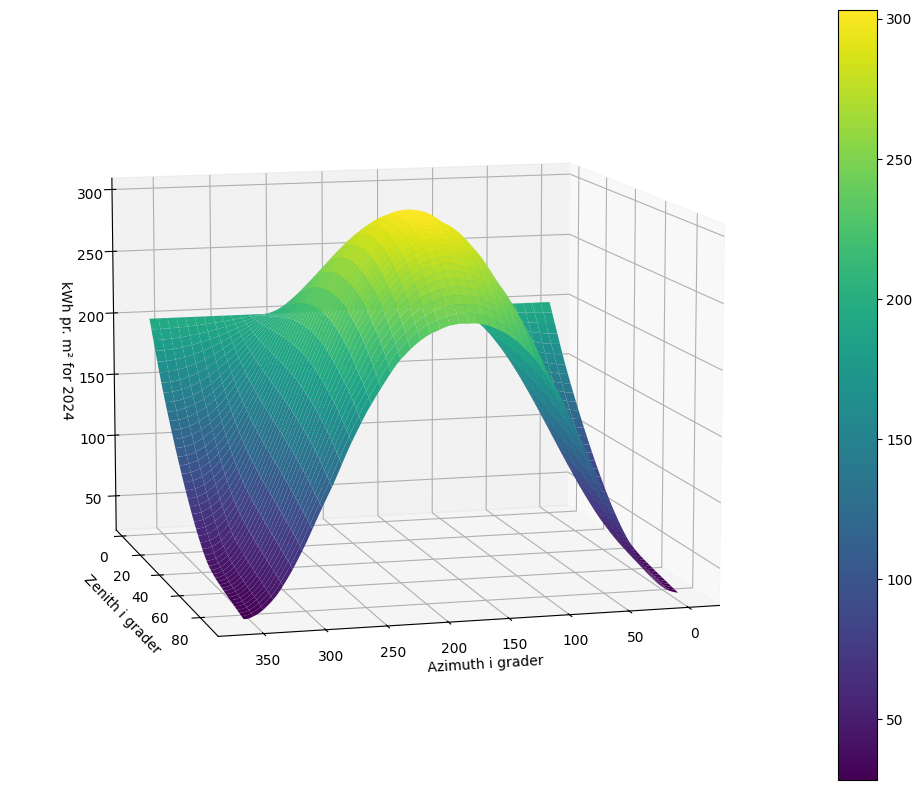

In [ ]:
theta, phi = np.meshgrid(range(361), range(91))

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(theta, phi, test, cmap='viridis')
ax.set_xlabel('Azimut i grader')
ax.set_ylabel('Zenit i grader')
ax.set_zlabel('kWh pr. m² for 2024')

fig.colorbar(surf)

ax.view_init(elev=10, azim=75)

plt.show()

In [46]:
#55.786327, 12.524295
#-33.92, 18.42
def getLocation():
    bGrad = float(input())
    lGrad = float(input())
    return bGrad, lGrad

currentLocation = getLocation()

bGrad = currentLocation[0]

lGrad = currentLocation[1]


loc = Location(bGrad, lGrad, tz="Europe/Copenhagen", altitude=40, name="DTU Bygning 101")


def setPhiPanel(bGrad):
    phi_panel = 0
    if bGrad > 0:
        phi_panel = 180
    else:
        phi_panel = 0
    return phi_panel

phi_panel = setPhiPanel(bGrad)

print(phi_panel, "her")
def times_of_days(start_date, end_date, freq="Min", tz="Europe/Copenhagen"):
    return pd.date_range(start_date + " 00:00:00", end_date + " 23:59:59", inclusive="left", freq=freq, tz=tz)

def solar_positions_of_day(loc, start_date, end_date, freq="Min", tz="Europe/Copenhagen"):
    return loc.get_solarposition(times_of_days(start_date, end_date, freq=freq, tz=tz))

def solar_panel_projection(theta_sun, phi_sun, theta_panel, phi_panel):
    return np.maximum(0, np.sin(theta_sun) * np.sin(theta_panel) * np.cos(phi_sun - phi_panel) + np.cos(theta_sun) * np.cos(theta_panel))

solpos = solar_positions_of_day(loc, "2024-01-01", "2024-12-31")
theta_sol = np.deg2rad(solpos["zenith"])
phi_sol = np.deg2rad(solpos["azimuth"])


def panel_production_for_year_for_integer_angles(phi_panel, panel_efficiency=0.2148, year=2024):
    l = []
    for theta_panel in range(91):
        f = flux(theta_sol, phi_sol, np.deg2rad(theta_panel), np.deg2rad(phi_panel))
        l.append((theta_panel, integrate.simps(f, dx=60) * panel_efficiency / 3600000))
    return l

def optimal_integer_angle_for_year(panel_efficiency=0.2148, year=2024):
    prod = panel_production_for_year_for_integer_angles(phi_panel, panel_efficiency=panel_efficiency, year=2024)
    max_prod = max(prod, key=lambda t: t[1])
    print("panelets azimut-vinkel skal være:", phi_panel)
    print("Nedenfor ser du dit panels zenit-vinkel samt hvor mange kWh du vil producere pr. kvadratmeter pr. år ")
    print(max_prod)

optimal_integer_angle_for_year()


0 her


/tmp/ipykernel_115477/841324270.py:47: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  l.append((theta_panel, integrate.simps(f, dx=60) * panel_efficiency / 3600000))


panelets azimut-vinkel skal være: 0
Nedenfor ser du dit panels zenit-vinkel samt hvor mange kWh du vil producere pr. kvadratmeter pr. år 
(1, 316.80637147714356)
